### Look at how correlated BSV is to preferred belief: 
https://www.notion.so/walkerlab/Look-at-belief-state-value-and-preferred-feature-belief-1d22dc9f99928041be54cf8c10497b37


In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
import scipy
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools
from tqdm import tqdm

In [19]:
subject = "SA"
sessions_path = f"/data/patrick_res/sessions/{subject}/valid_sessions.pickle"
valid_sess = pd.read_pickle(sessions_path)


In [20]:
all_beh = pd.concat(valid_sess.apply(lambda x: behavioral_utils.get_valid_belief_beh_for_sub_sess(subject, x.session_name), axis=1).values)
all_beh["PreferredBeliefProb"] = all_beh.apply(lambda x: x[f"{x.PreferredBelief}Prob"], axis=1)

<Axes: xlabel='BeliefStateValue', ylabel='PreferredBeliefProb'>

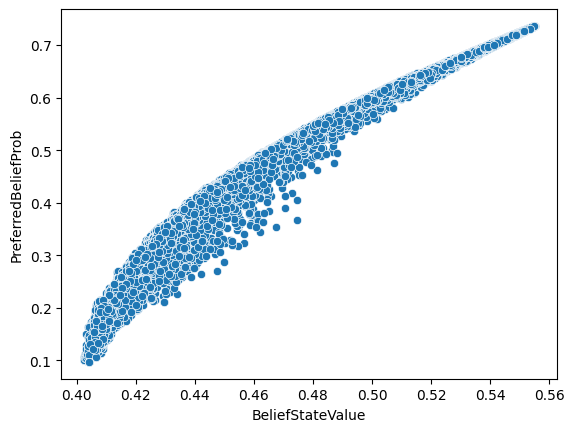

In [21]:
sns.scatterplot(all_beh, x="BeliefStateValue", y="PreferredBeliefProb")